In [2]:
# IMPORTING LIBRARIES


import numpy as np
np.random.seed(42)
import tensorflow as tf
tf.random.set_seed(42)
 
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.layers import LSTM, Dropout
from tensorflow.keras.layers import TimeDistributed
from tensorflow.keras.layers import Dense, Activation, Dropout, RepeatVector
from tensorflow.keras.optimizers import  RMSprop
import matplotlib.pyplot as plt
import pickle
import heapq

In [5]:
# LOADING THE DATA

path = '/content/drive/MyDrive/virtual internship/letsgrowmore/new_word_text.txt'
text = open(path,encoding = "utf8").read().lower()
print('corpus length:', len(text))

corpus length: 581886


In [6]:
# PREPROCESSING THE DATA


character = sorted(list(set(text)))
char_indices = dict((c, i) for i, c in enumerate(character))
indices_char = dict((i, c) for i, c in enumerate(character))
 
print(f'unique chars: {len(character)}')

unique chars: 72


In [7]:
seq_len = 40
step = 3
sentences = []
next_chars = []
for i in range(0, len(text) - seq_len, step):
    sentences.append(text[i: i + seq_len ])
    next_chars.append(text[i + seq_len])
print(f'num training examples: {len(sentences)}')

num training examples: 193949


In [8]:
import warnings
warnings.filterwarnings("ignore")

X = np.zeros((len(sentences), seq_len, len(character)), dtype=np.bool)
y = np.zeros((len(sentences), len(character)), dtype=np.bool)
for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        X[i, t, char_indices[char]] = 1
    y[i, char_indices[next_chars[i]]] = 1

sentences[124]
next_chars[100]

' '

In [9]:
X[0][0]

array([ True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False])

In [10]:
y[0]


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False])

In [11]:
# SHAPE OF THE DATA
X.shape

(193949, 40, 72)

In [12]:
y.shape

(193949, 72)

In [13]:
# MODEL CREATION


model = Sequential()
model.add(LSTM(128, input_shape=(seq_len, len(character))))
model.add(Dense(len(character)))
model.add(Activation('softmax'))

In [14]:
# GETTING THE SUMMARY OF THE MODEL
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               102912    
                                                                 
 dense (Dense)               (None, 72)                9288      
                                                                 
 activation (Activation)     (None, 72)                0         
                                                                 
Total params: 112,200
Trainable params: 112,200
Non-trainable params: 0
_________________________________________________________________


In [15]:
# TRAINING THE MODEL


optimizer = RMSprop(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history = model.fit(X, y,
                    validation_split=0.01, 
                    batch_size=128,
                    epochs=7, 
                    shuffle=True).history

Epoch 1/7
1501/1501 [==============================] - 190s 125ms/step - loss: 2.0583 - accuracy: 0.3965 - val_loss: 2.2006 - val_accuracy: 0.3634
Epoch 2/7
1501/1501 [==============================] - 200s 133ms/step - loss: 1.6770 - accuracy: 0.4978 - val_loss: 2.0601 - val_accuracy: 0.4253
Epoch 3/7
1501/1501 [==============================] - 179s 119ms/step - loss: 1.5559 - accuracy: 0.5317 - val_loss: 1.9599 - val_accuracy: 0.4541
Epoch 4/7
1501/1501 [==============================] - 181s 121ms/step - loss: 1.4897 - accuracy: 0.5506 - val_loss: 1.9102 - val_accuracy: 0.4696
Epoch 5/7
1501/1501 [==============================] - 179s 119ms/step - loss: 1.4472 - accuracy: 0.5612 - val_loss: 1.9086 - val_accuracy: 0.4675
Epoch 6/7
1501/1501 [==============================] - 180s 120ms/step - loss: 1.4179 - accuracy: 0.5680 - val_loss: 1.9182 - val_accuracy: 0.4840
Epoch 7/7
1501/1501 [==============================] - 179s 119ms/step - loss: 1.3954 - accuracy: 0.5748 - val_loss: 1

In [16]:
# SAVING THE MODEL
model.save('NW_keras_model.h5')
pickle.dump(history, open("history.p", "wb"))

In [17]:
# LOADING OUR MODEL
model = load_model('NW_keras_model.h5')
history = pickle.load(open("history.p", "rb"))

In [18]:
# EVALUATING THE MODEL
loss_and_acc=model.evaluate(X,y)
print("Test Loss", loss_and_acc[0])
print("Test Accuracy", loss_and_acc[1])

6061/6061 [==============================] - 147s 24ms/step - loss: 1.3486 - accuracy: 0.5884
Test Loss 1.348623514175415
Test Accuracy 0.5883866548538208


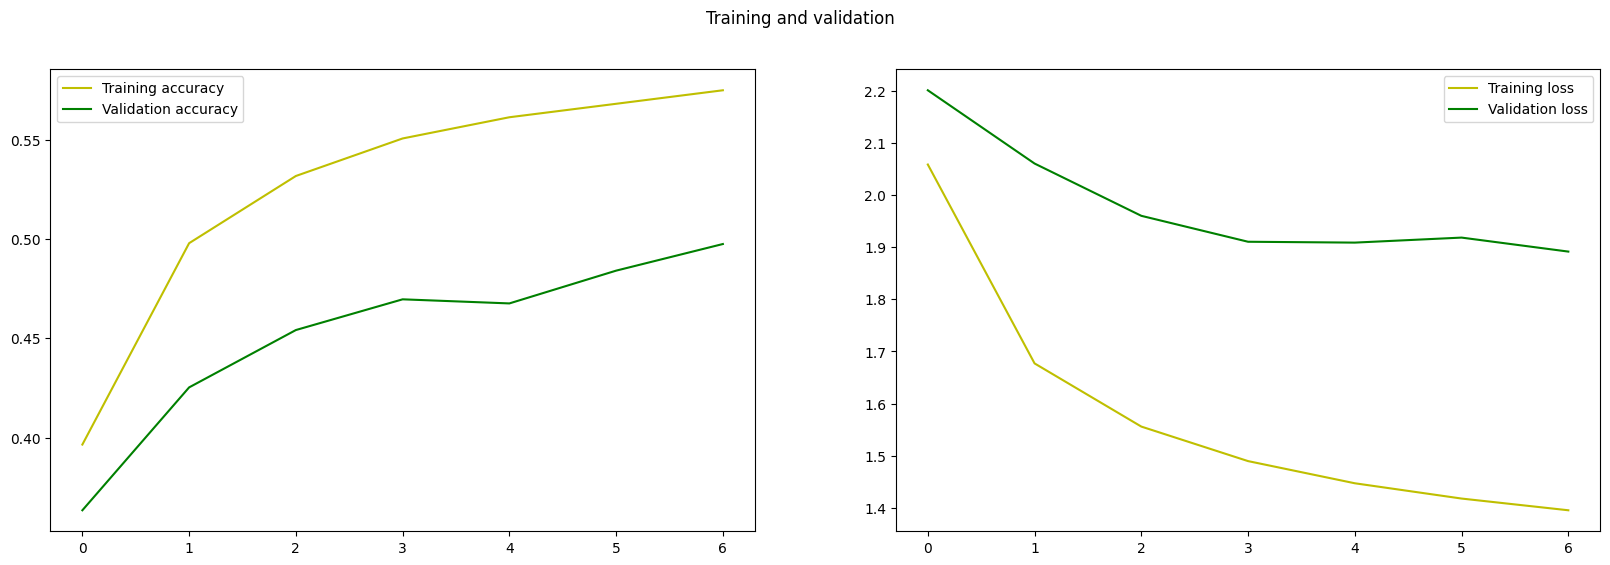

In [19]:
#PLOTTING THE TRAINING AND VALIDATION PLOTS

acc = history['accuracy']
val_acc = history['val_accuracy']
loss = history['loss']
val_loss = history['val_loss']
epochs = range(len(acc))


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
ax[0].plot(epochs, acc, 'y', label='Training accuracy')
ax[0].plot(epochs, val_acc, 'g', label='Validation accuracy')
ax[0].legend(loc=0)
ax[1].plot(epochs, loss, 'y', label='Training loss')
ax[1].plot(epochs, val_loss, 'g', label='Validation loss')
ax[1].legend(loc=0)

plt.suptitle('Training and validation')
plt.show()

In [20]:
def prepare_input(text):
    x = np.zeros((1, seq_len, len(character)))
    for t, char in enumerate(text):
        x[0, t, char_indices[char]] = 1.
        
    return x

prepare_input("This is an example of input of our model".lower())

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

In [21]:
# FUNCTIONS TO GET FURTHER CHARACTERS


def sample(preds, top_n=3):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds)
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    
    return heapq.nlargest(top_n, range(len(preds)), preds.take)

In [22]:
def predict_completion(text):
    original_text = text
    generated = text
    completion = ''
    while True:
        x = prepare_input(text)
        preds = model.predict(x, verbose=0)[0]
        next_index = sample(preds, top_n=1)[0]
        next_char = indices_char[next_index]
        text = text[1:] + next_char
        completion += next_char
        
        if len(original_text + completion) + 2 > len(original_text) and next_char == ' ':
            return completion

In [23]:
def predict_completions(text, n=3):
    x = prepare_input(text)
    preds = model.predict(x, verbose=0)[0]
    next_indices = sample(preds, n)
    return [indices_char[idx] + predict_completion(text[1:] + indices_char[idx]) for idx in next_indices]
     

In [24]:
# PREDICTION


quotes = [   
    "Deep learning is a branch of machine learning which is based on artificial neural networks.",
    "It is capable of learning complex patterns and relationships within data.",
    "In deep learning, we don’t need to explicitly program everything. It has become increasingly popular in recent years due to the advances in processing power and the availability of large datasets.",
    "Because it is based on artificial neural networks (ANNs) also known as deep neural networks (DNNs).",
    "These neural networks are inspired by the structure and function of the human brain’s biological neurons, and they are designed to learn from large amounts of data."  
    
]

In [25]:
for q in quotes:
    seq = q[:40].lower()
    print(seq)
    print(predict_completions(seq, 5))
    print()

deep learning is a branch of machine lea
['st ', 'ding ', 'ving ', 'rned ', 'ther ']

it is capable of learning complex patter
['ed ', 's ', 'able ', ' at ', 'nation ']

in deep learning, we don’t need to expli
['es ', 'ce ', 'ted ', 'ar ', 'ng ']

because it is based on artificial neural
[' as ', 'ice ', '\ntable ', 'ly ', ', ']

these neural networks are inspired by th
['e ', 'at ', 'is ', 'rough ', 'ought ']

